# Análise de Dados Imobiliarios 

A análise foi feita de acordo com o Dataset forecidoo no site www.kaggle.com

 Perguntas Que serão Respondidas:

1. Qual é a distribuição das vendas e margens de lucro?
2. Qual categoria gerou a maior receita total?
3. Existe algum padrão sazonal nas vendas?
4. Qual estação teve o maior total de vendas?
5. Qual localização tem a maior média de vendas por produto?
6. Existem diferenças nas vendas ou margens de lucro com base na localização (rural, suburbana, urbana)?

#

# Importando as Ferramentas e informações

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Carregar o arquivo CSV
df = pd.read_csv('Furniture.csv')
# Exibir as primeiras linhas
df.head()


,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


#

# Verificando as informações 

In [13]:
# Verificar se há valores ausentes
df.isnull().sum()


price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [14]:
# Verificar tipos de dados
df.dtypes

price                  float64
cost                   float64
sales                    int64
profit_margin          float64
inventory                int64
discount_percentage    float64
delivery_days            int64
category                object
material                object
color                   object
location                object
season                  object
store_type              object
brand                   object
revenue                float64
dtype: object

In [15]:
# Salvar em um novo arquivo CSV
df.to_csv('dados_tratados.csv', index=False)

In [16]:
# Calculando estatísticas resumidas
summary_stats = df[['price', 'cost', 'sales', 'profit_margin']].describe()

print("Estatísticas resumidas:")
print(summary_stats)

Estatísticas resumidas:
             price         cost        sales  profit_margin
count  2500.000000  2500.000000  2500.000000    2500.000000
mean    274.495219   191.930107    24.924000      30.208571
std     130.898452    98.590751    14.050067      11.536804
min      50.704297    26.505895     1.000000      10.017692
25%     159.104890   106.399135    13.000000      20.230697
50%     277.641809   189.336329    25.000000      30.297911
75%     387.378046   263.188280    37.000000      40.134205
max     499.872953   447.022911    49.000000      49.999535


#

# 1.  Qual é a distribuição das vendas e margens de lucro?

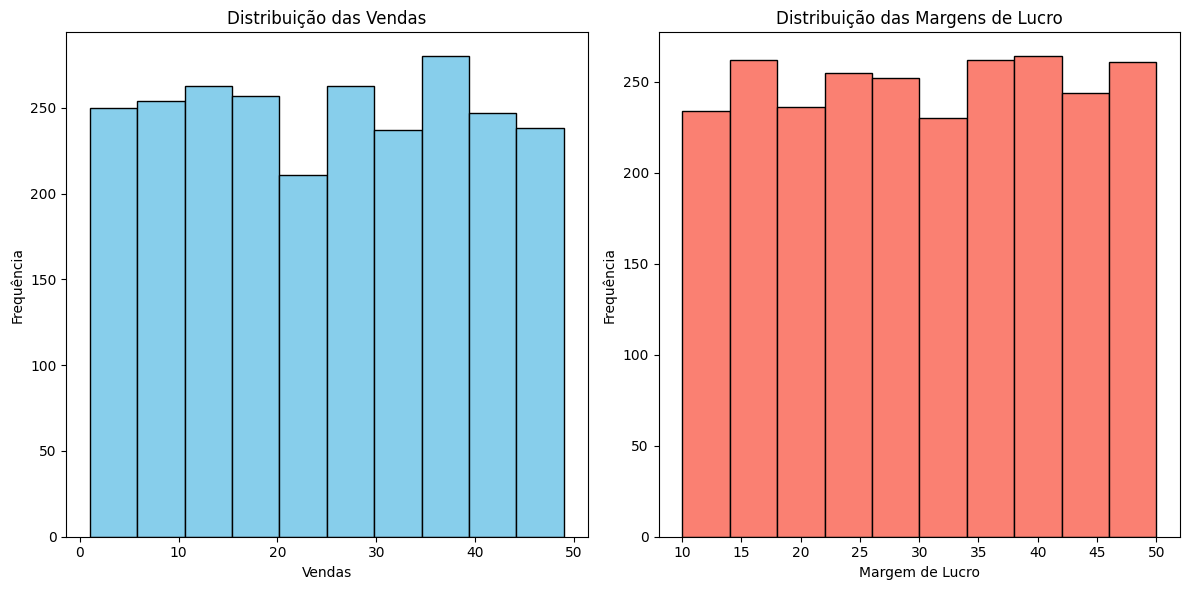

In [17]:
# Plotando o histograma para vendas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['sales'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Distribuição das Vendas')

# Plotando o histograma para margens de lucro
plt.subplot(1, 2, 2)
plt.hist(df['profit_margin'], bins=10, edgecolor='black', color='salmon')
plt.xlabel('Margem de Lucro')
plt.ylabel('Frequência')
plt.title('Distribuição das Margens de Lucro')

plt.tight_layout()
plt.show()

De acordo com as informações fornecidas podemos ver que os graficos apresentam uma forte semelhança Possuindo poucas diferenças entre as vendas e o lucro

#

# 2. Qual categoria gerou a maior receita total?

In [18]:
# Calculando a receita total por categoria
category_revenue = df.groupby('category')['revenue'].sum()

# Encontrando a categoria com a maior receita
highest_revenue_category = category_revenue.idxmax()
highest_revenue_value = category_revenue.max()

print(f"A categoria que gerou a maior receita total é '{highest_revenue_category}' com uma receita de {highest_revenue_value:.2f}.")

A categoria que gerou a maior receita total é 'Table' com uma receita de 3366945.45.


#

# 3. Existe algum padrão sazonal nas vendas?

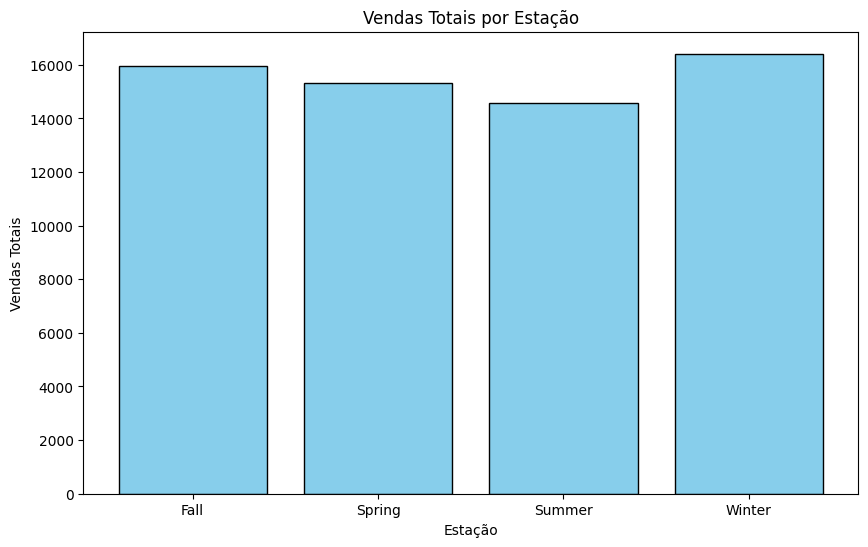

Vendas totais por estação:
season
Fall      15970
Spring    15339
Summer    14588
Winter    16413
Name: sales, dtype: int64


In [19]:
# Calculando as vendas totais por estação
seasonal_sales = df.groupby('season')['sales'].sum()

# Plotando as vendas por estação
plt.figure(figsize=(10, 6))
plt.bar(seasonal_sales.index, seasonal_sales.values, color='skyblue', edgecolor='black')
plt.xlabel("Estação")
plt.ylabel("Vendas Totais")
plt.title("Vendas Totais por Estação")
plt.show()

print("Vendas totais por estação:")
print(seasonal_sales)

Há um leve padrão sazonal nas vendas, com o inverno e outono apresentando as maiores vendas, e o verão as menores. Isso pode indicar que as vendas aumentam durante os meses mais frios, possivelmente devido a mudanças nos hábitos de consumo durante essas épocas.

#

# 4. Qual estação teve o maior total de vendas?

In [20]:
seasonal_sales = df.groupby('season')['sales'].sum()

# Encontrando a estação com o maior total de vendas
max_sales_season = seasonal_sales.idxmax()
max_sales_value = seasonal_sales.max()

print(f"A estação com o maior total de vendas é {max_sales_season} com {max_sales_value} vendas totais.")

A estação com o maior total de vendas é Winter com 16413 vendas totais.


#

# 5. Qual localização tem a maior média de vendas por produto?

In [21]:
location_sales_mean = df.groupby('location')['sales'].mean()

# Encontrando a localização com a maior média de vendas
max_sales_location = location_sales_mean.idxmax()
max_sales_value = location_sales_mean.max()

print(f"A localização com a maior média de vendas por produto é {max_sales_location} com uma média de {max_sales_value:.2f} vendas por produto.")

A localização com a maior média de vendas por produto é Urban com uma média de 25.21 vendas por produto.


#

# 6. Existem diferenças nas vendas ou margens de lucro com base na localização (rural, suburbana, urbana)?

In [22]:
sales_by_location = df.groupby('location')['sales'].agg(['mean', 'median'])
profit_margin_by_location = df.groupby('location')['profit_margin'].agg(['mean', 'median'])

# Exibindo os resultados
print("Média e Mediana das Vendas por Localização:")
print(sales_by_location)
print("\nMédia e Mediana das Margens de Lucro por Localização:")
print(profit_margin_by_location)

Média e Mediana das Vendas por Localização:
               mean  median
location                   
Rural     24.943144    25.0
Suburban  24.623616    25.0
Urban     25.211392    25.0

Média e Mediana das Margens de Lucro por Localização:
               mean     median
location                      
Rural     29.964232  29.866195
Suburban  30.462099  30.074802
Urban     30.225096  30.881855


# Vendas por Localização

Média: A média das vendas é ligeiramente mais alta em 'Urbana' (25.21) comparado com 'Rural' (24.94) e 'Suburbana' (24.62).

Mediana: A mediana das vendas é igual para todas as localizações, indicando que a distribuição das vendas é semelhante para essas localizações, mas a média pode ser afetada por valores extremos.

# Margem de Lucro por Localização

Média: A margem de lucro média é mais alta na 'Suburbana' (30.46) comparado com 'Rural' (29.96) e 'Urbana' (30.23).

Mediana: A mediana da margem de lucro é mais alta na 'Urbana' (30.88) comparado com 'Rural' (29.87) e 'Suburbana' (30.07), indicando que a distribuição pode ter valores mais altos na 'Urbana'.